# Version 1

In [1]:
import tensorflow as tf

In [12]:
tf.compat.v1.disable_eager_execution()
tf

<module 'tensorflow' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\tensorflow\\__init__.py'>

In [15]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [13]:
X = tf.constant("tensorflow")
X

<tf.Tensor 'Const_1:0' shape=() dtype=string>

In [14]:
sess = tf.compat.v1.Session()
s = sess.run(X)
print(s)
sess.close()

b'tensorflow'


In [19]:
x = tf.constant(4)
y = tf.constant(5)

z= tf.add(x,y)
z

<tf.Tensor 'Add_3:0' shape=() dtype=int32>

In [20]:
with tf.compat.v1.Session() as sess:
    result = sess.run(z)
    print(result)

9


In [30]:
import numpy as np
var = np.arange(1,13,dtype=np.int32)
var2 = np.arange(15,27,dtype=np.int32)

In [31]:
mat1 = tf.constant(var,shape=[3,4])
mat2 = tf.constant(var2,shape=[4,3])

prod_mat = tf.matmul(mat1,mat2)
prod_mat

<tf.Tensor 'MatMul_5:0' shape=(3, 3) dtype=int32>

In [32]:
with tf.compat.v1.Session() as sess:
    print(sess.run(prod_mat))

[[210 220 230]
 [522 548 574]
 [834 876 918]]


In [49]:
v1 = tf.constant([1,2,3,4])
v2 = tf.constant([6,7,8,9])

add = tf.add(v1,v2)
sub = tf.subtract(v1,v2)
mult = tf.multiply(v1,v2)
div = tf.divide(v1,v2)

with tf.compat.v1.Session() as sess:
    print(sess.run(add))
    print(sess.run(sub))
    print(sess.run(mult))
    print(sess.run(div))

[ 7  9 11 13]
[-5 -5 -5 -5]
[ 6 14 24 36]
[0.16666667 0.28571429 0.375      0.44444444]


In [53]:
w = tf.Variable([[1,2,3]],shape=(1,3))
X = tf.constant([[3],[4],[4]],shape=(3,1))
b = tf.Variable(1)
h=tf.add(tf.matmul(w,X),b)
h

<tf.Tensor 'Add_13:0' shape=(1, 1) dtype=int32>

In [56]:
init = tf.compat.v1.global_variables_initializer()

In [57]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run(h))

[[24]]


# Version 2

In [15]:
import tensorflow as tf

In [16]:
x1 = tf.constant(1,name = 'constant 1')
x2 = tf.constant(2,name = 'constant 2')
x3 = tf.add(x1,x2)
x3.numpy()

3

In [17]:
v1 = tf.constant([1,2,3,4])
v2 = tf.constant([6,7,8,9])
v = tf.add(v1,v2)
v.numpy()

array([ 7,  9, 11, 13])

# Linear regression

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [2]:
dataset = pd.read_csv('data/FuelConsumptionCo2.csv.xls')

In [3]:
dataset

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,SUV_SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,SUV_SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,SUV_SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,SUV_SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   Brands                    1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 100.2+ KB


In [5]:
dataset.drop(['MODELYEAR','TRANSMISSION'], axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.FUELTYPE = le.fit_transform(dataset.FUELTYPE)
dataset.Brands = le.fit_transform(dataset.Brands)
dataset.VEHICLECLASS = le.fit_transform(dataset.VEHICLECLASS)

In [7]:
dataset

,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,0,2.0,4,3,9.9,6.7,8.5,33,196
1,0,0,2.4,4,3,11.2,7.7,9.6,29,221
2,0,0,1.5,4,3,6.0,5.8,5.9,48,136
3,0,11,3.5,6,3,12.7,9.1,11.1,25,255
4,0,11,3.5,6,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
1062,38,11,3.0,6,2,13.4,9.8,11.8,24,271
1063,38,11,3.2,6,2,13.2,9.5,11.5,25,264
1064,38,11,3.0,6,2,13.4,9.8,11.8,24,271
1065,38,11,3.2,6,2,12.9,9.3,11.3,25,260


In [8]:
X = dataset.ENGINESIZE.values
y = dataset.CO2EMISSIONS.values

In [9]:
X

array([2. , 2.4, 1.5, ..., 3. , 3.2, 3.2])

In [10]:
y

array([196, 221, 136, ..., 271, 260, 294], dtype=int64)

# Y = wx + b

In [96]:
X = tf.constant(X,dtype=tf.float32)
y = tf.constant(y,dtype=tf.float32)

w = tf.Variable(tf.random.normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random.normal([1]),dtype=tf.float32)

In [97]:
w

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.6374209], dtype=float32)>

In [98]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.5042439], dtype=float32)>

In [99]:
# define the model
def h(X):
 y_p = w*X+b
 return y_p

In [100]:
# cost function (y_p - y)

def cost_function(y_p,y):
    mse = tf.reduce_mean(tf.square(y-y_p))
    return mse

In [101]:
# train the model
lr =0.001
epochs = 100
losses_values = []
for epoch in range(epochs):
    with tf.GradientTape() as tape:

        # feed forward
        y_p = h(X)
        # back propagation
        loss = cost_function(y,y_p)
        losses_values.append(loss)
        # update weights
        gradients = tape.gradient(loss, [w,b])

        w.assign_sub(lr*gradients[0])
        b.assign_sub(lr*gradients[1])

In [102]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2754.2637>

Text(0, 0.5, 'Loss')

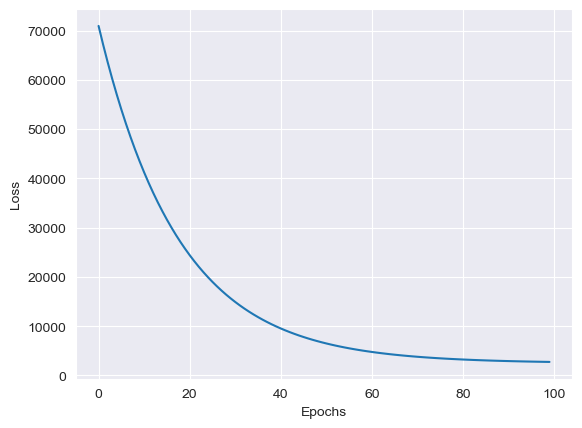

In [103]:
plt.plot(losses_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

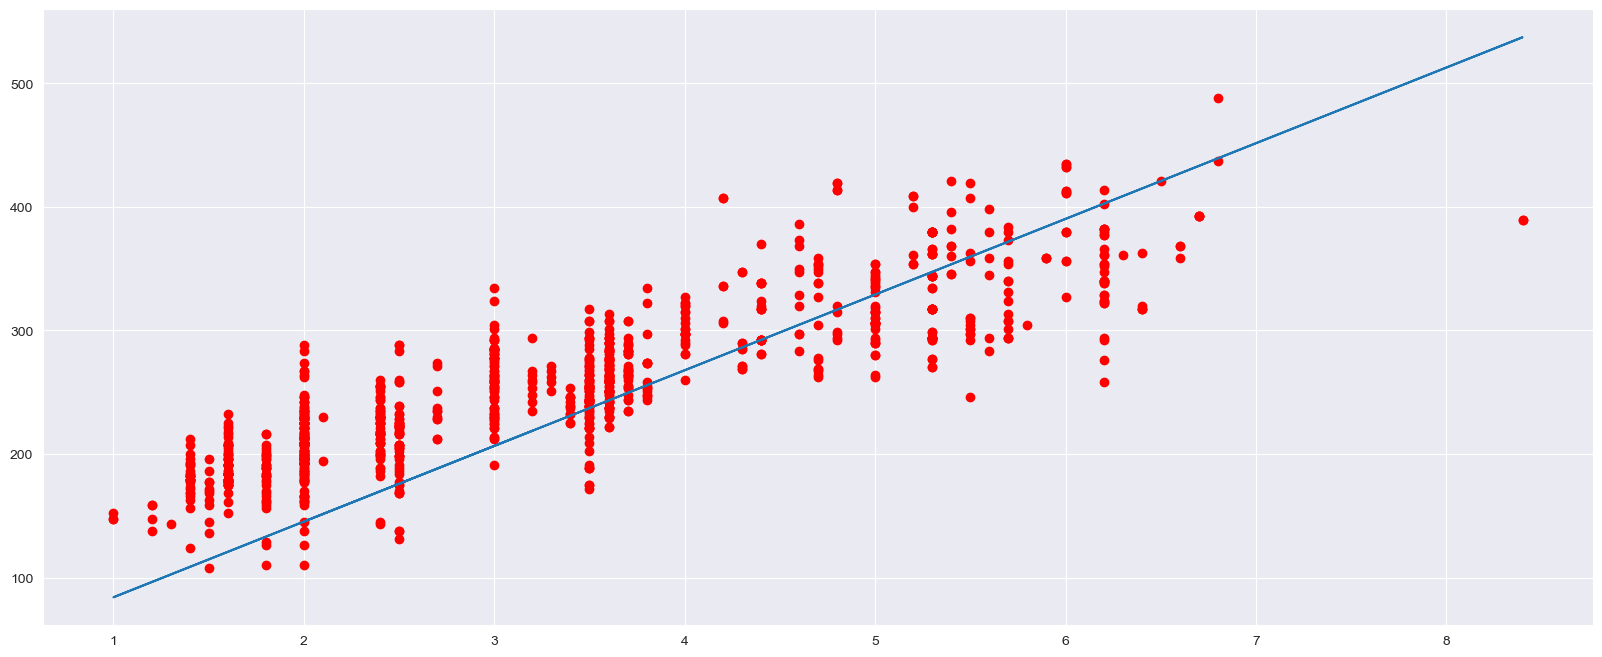

In [107]:
plt.figure(figsize=(20,8))
plt.scatter(X.numpy(),y.numpy(),color='red')
plt.plot(X.numpy(),w*X.numpy()+b)

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brands                    1067 non-null   int32  
 1   VEHICLECLASS              1067 non-null   int32  
 2   ENGINESIZE                1067 non-null   float64
 3   CYLINDERS                 1067 non-null   int64  
 4   FUELTYPE                  1067 non-null   int32  
 5   FUELCONSUMPTION_CITY      1067 non-null   float64
 6   FUELCONSUMPTION_HWY       1067 non-null   float64
 7   FUELCONSUMPTION_COMB      1067 non-null   float64
 8   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 9   CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int32(3), int64(3)
memory usage: 71.0 KB


# Keras Sequential Model

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [110]:
X = dataset.drop('CO2EMISSIONS',axis=1)
y = dataset['CO2EMISSIONS']

In [123]:
model = Sequential()
model.add(Dense(units=3,activation='relu',input_dim=(9)))
model.add(Dense(units=3,activation='relu'))
model.add(Dense(units=1))

In [124]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 30        
                                                                 
 dense_11 (Dense)            (None, 3)                 12        
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(optimizer='sgd',loss='mse')

In [126]:
model.fit(X,y,epochs=2,batch_size=len(X))

Epoch 1/2
1/1 [==============================] - 1s 551ms/step - loss: 72808.6328
Epoch 2/2
1/1 [==============================] - 0s 10ms/step - loss: 67002.4766


# Keras Functional Model

In [127]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input

In [130]:
inp = Input((9,))
h1 = Dense(units=3,activation='relu')(inp)
h2 = Dense(units=3,activation='relu')(h1)
output = Dense(units=1)(h2)
model = Model(inputs=inp,outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_17 (Dense)            (None, 3)                 30        
                                                                 
 dense_18 (Dense)            (None, 3)                 12        
                                                                 
 dense_19 (Dense)            (None, 1)                 4         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
